In [1]:
import csv
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math

In [2]:
EPS = 1e-4

# Данные выборки:

Выборка данных с интервальной неопределённостью, число отсчётов в выборке равно 200:

In [14]:
data = []
with open('Chanel_1_600nm_0.23mm.csv') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=";")
  for row in spamreader:
    data.append(float(row[0]))

In [15]:
data

[0.5128719,
 0.5129315,
 0.5129315,
 0.5129315,
 0.5129613,
 0.5129911,
 0.5129911,
 0.5129911,
 0.5130209,
 0.5130209,
 0.5130507,
 0.5130507,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5130805,
 0.5131103,
 0.5131103,
 0.5131401,
 0.5131401,
 0.5131401,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131699,
 0.5131997,
 0.5131997,
 0.5131997,
 0.5131997,
 0.5131997,
 0.5131997,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132295,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132593,
 0.5132891,
 0.5132891,
 0.5132891,
 0.5132891,
 0.5132891,
 0.5132891,
 0.5132891,
 0.5132891,
 0.5133189,
 0.5133189,
 0.5

Построение диаграммы рассеяния выборки с уравновешенным интервалом погрешности:

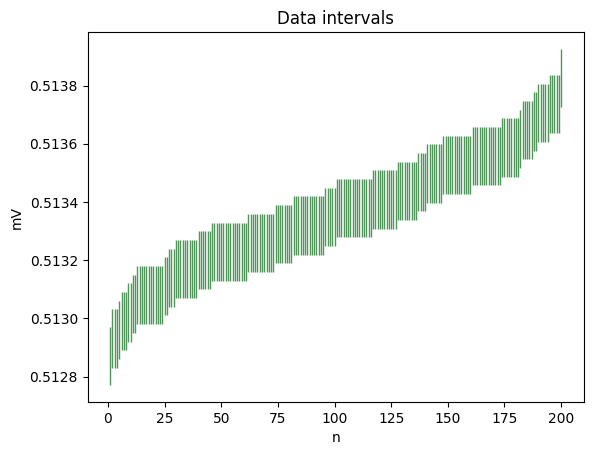

In [17]:
data_n = [t for t in range(1, len(data) + 1)]
data1 = [[data[i] - EPS, data[i] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#50965a", lw = 1)

plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("intervals_1.png")

# Варьирование неопределённости измерений:

Построение диаграммы рассеяния выборки и регрессионная прямая по модели (4) и (5):

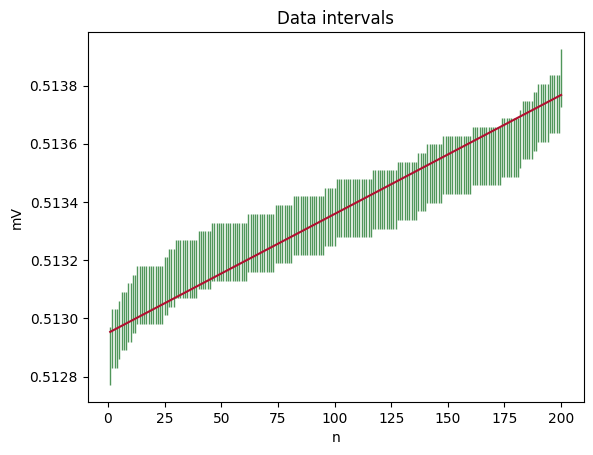

In [73]:
data_n = [t for t in range(1, len(data1) + 1)]
data1 = [[data[i] - EPS, data[i] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#50965a", lw = 1)

y = []
for i in range(len(data1)):
  y.append(0.51295 + 4.0874e-06 * data_n[i])

plt.plot(data_n, y, '#b01030')
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("intervals_2.png")


# Варьирование неопределённости измерений с расширением и сужением интервалов:

Построение диаграммы рассеяния выборки и регрессионная прямая по модели (10) и (11)

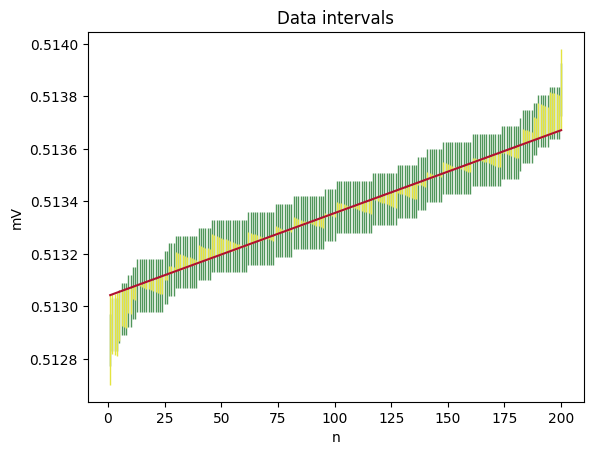

In [74]:
w = []
with open('w.csv') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=";")
  for row in spamreader:
    w.append(float(row[0]))

data_n = [t for t in range(1, len(data) + 1)]
data1 = [[data[i] - EPS, data[i] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#50965a", lw = 1)

y = []
for i in range(len(data1)):
  y.append(0.51304 + 3.1553e-06 * data_n[i])

for i in range(len(data1)):
  plt.vlines(data_n[i], (data1[i][0] + data1[i][1]) / 2 - w[i] * EPS, (data1[i][0] + data1[i][1]) / 2 + w[i] * EPS, colors = "#E4E43F", lw = 1)

plt.plot(data_n, y, '#b01030')
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("intervals_3.png")

Построение графиков векторов w и w0, полученных при использовании двух
рассмотренных подходов:


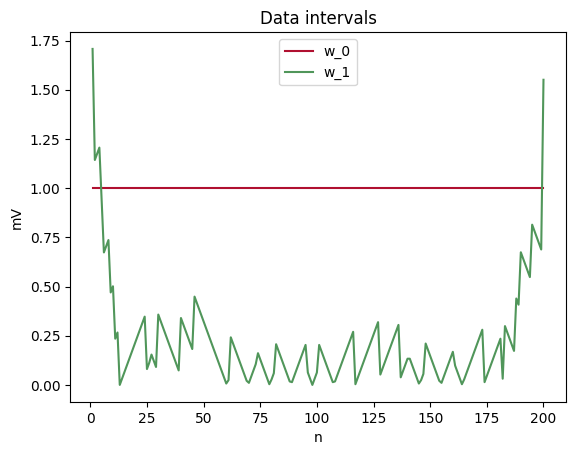

In [27]:
w0 = []
with open('w0.csv') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=";")
  for row in spamreader:
    w0.append(float(row[0]))

d = [t for t in range(1, len(w) + 1)]

plt.plot(d, w0, '#b01030', label="w_0")
plt.plot(d, w, "#50965a", label="w_1")
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.legend()
plt.savefig("omega.png")

# Анализ регрессионных остатков:

Построение диаграммы рассеяния регрессионных остатков выборки по модели (4) и (5):

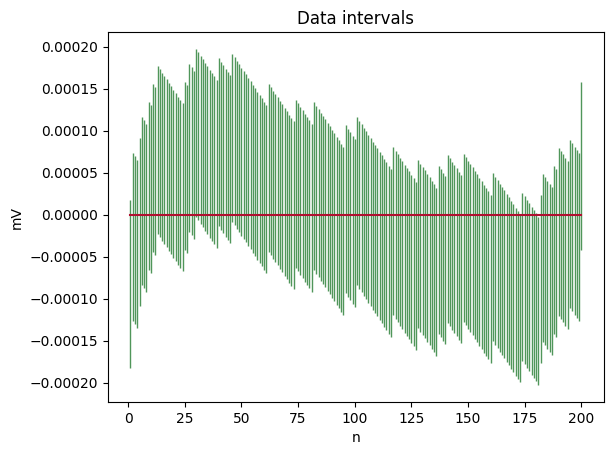

In [76]:

data_n = [t for t in range(1, len(data) + 1)]

y0 = []
y1 = []
y2 = []
for i in range(len(data1)):
  y0.append(0.51295 + 4.0874e-06 * data_n[i]) 
  y1.append(0.51304 + 3.1553e-06 * data_n[i]) 
  y2.append(0)

for i in range(len(data1)):
  plt.vlines(data_n[i], data[i] - y0[i] - EPS, data[i] - y0[i] + EPS, colors="#50965a", lw=1)

plt.plot(data_n, y2, '#b01030')
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("regression_1.png")


Построение диаграммы рассеяния регрессионных остатков выборки по модели (10) и (11):

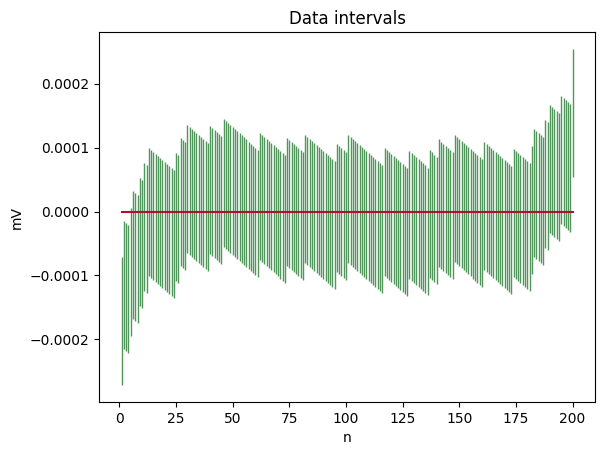

In [29]:
for i in range(len(data)):
  plt.vlines(data_n[i], data[i] - y1[i] - EPS, data[i] - y1[i] + EPS, colors="#50965a", lw=1)

plt.plot(data_n, y2, '#b01030')
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("regression_2.png")

Построение графика частот элементарных подинтервалов регрессионных остатков выборки, модели (4) и (5) — желтый график, и (10) и (11) — зеленый график:

In [30]:
def findMu(data, interval):
    count = 0
    for i in range(len(data)):
        if ((data[i][1]) > (interval[1])) and ((data[i][0]) < (interval[0])):
            count = count + 1
    return count

In [31]:
def findAllMu(data, z):
    mu = []
    for i in range(len(z)):
        mu.append(findMu(data, z[i]))
    return mu

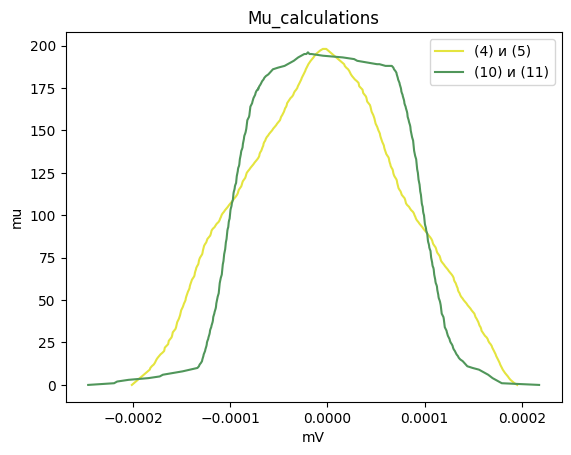

In [77]:

data_n = [t for t in range(1, len(data) + 1)]

y0 = []
y1 = []
for i in range(len(data)):
  y0.append(0.51295 + 4.0874e-06 * data_n[i])
  y1.append(0.51304 + 3.1553e-06 * data_n[i]) 

regression0 = []
regression1 = []
for i in range(len(data)):
  regression0.append([data[i] - y0[i] - EPS, data[i] - y0[i] + EPS])
  regression1.append([data[i] - y1[i] - EPS, data[i] - y1[i] + EPS])

tmp_z0 = []
tmp_z1 = []

for i in range(len(data)):
  tmp_z0.append(regression0[i][0])
  tmp_z0.append(regression0[i][1])
  tmp_z1.append(regression1[i][0])
  tmp_z1.append(regression1[i][1])

tmp_z0.sort()
tmp_z1.sort()
z0 = []
z1 = []
for i in range(len(tmp_z0) - 1):
  z0.append([tmp_z0[i], tmp_z0[i + 1]])
  z1.append([tmp_z1[i], tmp_z1[i + 1]])

mu0 = findAllMu(regression0, z0)
mu1 = findAllMu(regression1, z1)
mV0 = []
mV1 = []

for i in range(len(z0)):
  mV0.append((z0[i][0] + z0[i][1]) / 2)
  mV1.append((z1[i][0] + z1[i][1]) / 2)

plt.plot(mV0, mu0, color = '#E4E43F',label = '(4) и (5)') 
plt.plot(mV1, mu1, color = '#50965a', label = '(10) и (11)')
plt.title('Mu_calculations')
plt.xlabel('mV')
plt.ylabel('mu')
plt.legend()
plt.savefig("input_mu.png")

# Информационное множество задачи:

Построение информационного множества по модели (10) и (11), интервальная оболочка — желтый брус:

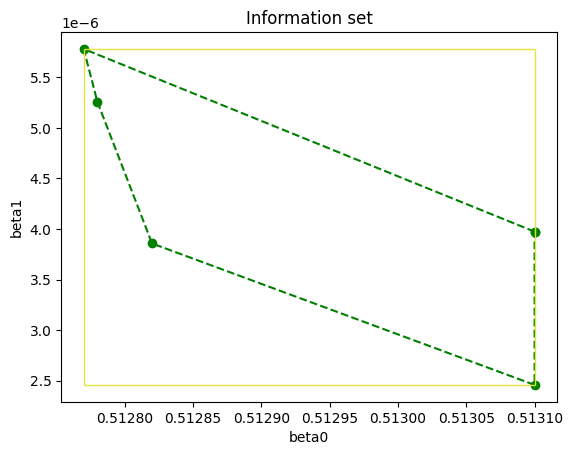

In [78]:
beta0 = [0.5131, 0.51277, 0.51278, 0.51282, 0.5131, 0.5131] 
beta1 = [3.9733e-06, 5.7817e-06, 5.2588e-06, 3.8571e-06, 2.4572e-06, 3.9733e-06]

plt.plot(beta0, beta1, 'go--')

plt.vlines(0.5131, 5.7817e-06, 2.4572e-06, colors="#E4E43F", lw=1)
plt.vlines(0.51277, 5.7817e-06, 2.4572e-06, colors="#E4E43F", lw=1)
plt.hlines(5.7817e-06, 0.5131, 0.51277, colors="#E4E43F", lw=1)
plt.hlines(2.4572e-06, 0.5131, 0.51277, colors="#E4E43F", lw=1)

plt.title('Information set')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.savefig("inform_set.png")


# Построение прогноза внутри и вне области данных:

Коридор совместных зависимостей:

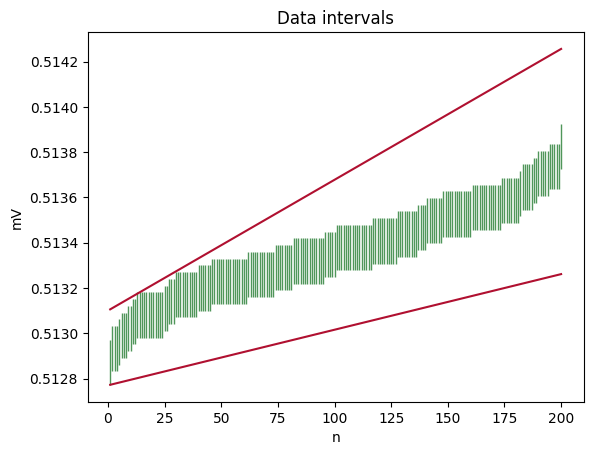

In [79]:

data_n = [t for t in range(1, len(data) + 1)]
data1 = [[data[i] - EPS, data[i] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors="#50965a", lw=1)

y0 = []
y1 = []

for i in range(len(data1)):
  y0.append(5.1277e-01 + 2.4572e-06 * data_n[i])
  y1.append(5.131e-01 + 5.7817e-06 * data_n[i])

plt.plot(data_n, y0, '#b01030')
plt.plot(data_n, y1, '#b01030')
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("intervals_4.png")

Коридор совместных зависимостей, построение прогноза

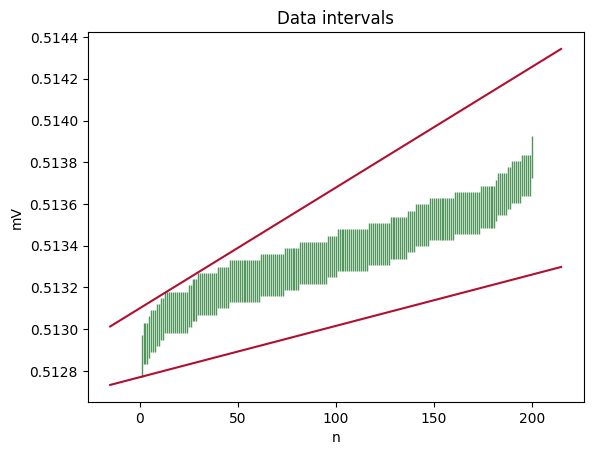

In [72]:

data_n = [t for t in range(1, len(data) + 1)]
data_n1 = [t for t in range(-15, len(data) + 16)]
data1 = [[data[i] - EPS, data[i] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors="#50965a", lw=1)

y0 = []
y1 = []

for i in range(len(data_n1)):
  y0.append(5.1277e-01 + 2.4572e-06 * data_n1[i])
  y1.append(5.131e-01 + 5.7817e-06 * data_n1[i])
  
plt.plot(data_n1, y0, '#b01030')
plt.plot(data_n1, y1, '#b01030')
plt.title('Data intervals')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("intervals_5.png")